# 9. Mixture Models and EM

## 9.1 K-means Clustering

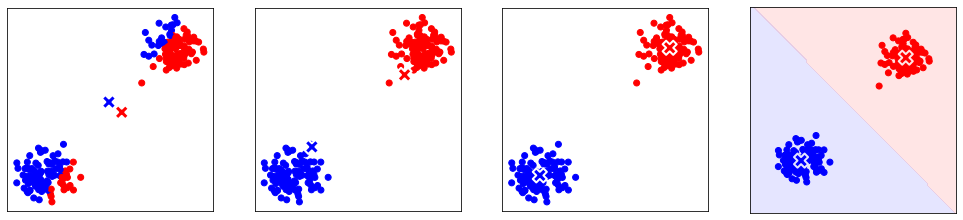

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustering import *


def make_blob():
    cls1 = np.random.normal(size=(100, 2), scale=1) + np.array([5, 5])
    cls2 = np.random.normal(size=(100, 2), scale=1) + np.array([-5, -5])
    return np.vstack([cls1, cls2])

# training data & test data
X_train = make_blob()
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([X, Y]).reshape(2, -1).T

''' k-means '''
model = Kmeans(n_clusters=2)
model.fit(X_train)
Z = model.predict(X_test)


fig = plt.figure(figsize=(17,4))
for n, (key, val) in enumerate(model.centers.items()):
    fig.add_subplot(1, len(model.centers), n+1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=np.where(model.cls_X[key], 'r', 'b'))
    plt.scatter(*model.centers[key].T, s=200, marker='X', lw=2, c=['b', 'r'], edgecolor="white")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False,left=False)
plt.contourf(X, Y, Z.reshape(X.shape), alpha=0.1, levels=np.linspace(0,1,3), colors=['b', 'r'])
plt.show()

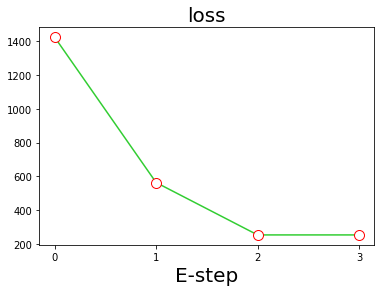

In [2]:
loss = model.loss
plt.plot(loss, c='limegreen', marker='o', markerfacecolor='w', markeredgecolor='r', markersize=10, markevery=0.1)
plt.xlabel("E-step",fontsize=20)
plt.title("loss", fontsize=20)
plt.xticks(np.arange(0,len(loss),1))
plt.show()

## 9.2.2  EM for Gaussian mixtures

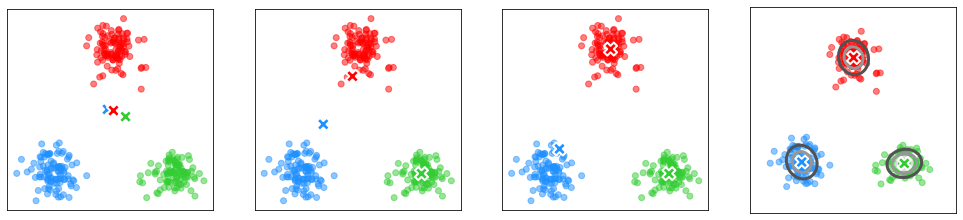

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *


def make_blobs():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    x3 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    return np.vstack((x1, x2, x3))


# training data & test data
X_train = make_blobs()
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([X, Y]).reshape(2, -1).T


''' ML estimation with EM-algorithm '''
prob_dist = MultivariateGaussianMixture(n_components = 3)
prob_dist.fit(X_train)
labels = prob_dist.classify(X_train)
Z = prob_dist.predict(X_test)


# plot training data & prediction data
fig = plt.figure(figsize=(17,4))
keys = list(prob_dist.centers.keys())
n_step = len(keys)
keys = [keys[0], keys[n_step // 3], keys[2 * n_step // 3], keys[-1]]
c=['dodgerblue', 'r', 'limegreen']
for n, key in enumerate(keys):
    fig.add_subplot(1, len(keys), n+1)
    plt.scatter(*X_train.T, c=[c[int(label)] for label in labels], alpha=.5)
    plt.scatter(*prob_dist.centers[key].T, s=170, marker='X', lw=2, c=c, edgecolor="white", zorder=3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False,left=False)
plt.contour(X, Y, Z.reshape(X.shape), levels=np.linspace(min(Z), max(Z), 5), linewidths=3, cmap='Greys_r')
plt.show()

## 9.3.3 Mixtures of Bernoulli distributions

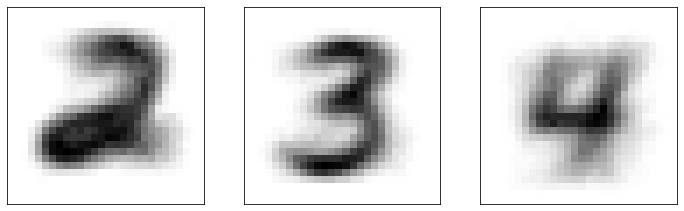

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from deepL_module.datasets.mnist import load_mnist
from pd import *


def fetch_mnist(fetch_nums:list):
    (x, y), (_, _) = load_mnist(normalize=True)
    X = np.array([x[np.where(y == i)[0][:200]] for i in fetch_nums])
    X = (1 - X).reshape(200 * len(fetch_nums), 784) # binary inversion
    return (X > .5).astype(np.float)


X_train = fetch_mnist([2, 3, 4])


''' EM-estimation '''
prob_dist = MultivariateBernoulli(n_components=3)
prob_dist.fit(X_train)



plt.figure(figsize=(12, 5))
for i, mean in enumerate(prob_dist.means):
    plt.subplot(1, 3, i + 1)
    plt.imshow(mean.reshape(28, 28), cmap="gray")
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False, left=False)
plt.show()